##  Model

<font  face=Times color=darkblue size=3> The model hamiltonian is: $$H=J\sum_{<i,j>}\vec{S_i}\cdot \vec{S_j}=J\sum_{<i,j>}(\frac{1}{2}(S_i^+S_j^-+S_i^-S_j^+)+S_i^zS_j^z)$$ with the spin raising/lowering operators.<br><br> We consider $S=1$ 1-dimensional spin chain here and take $N=2$ as an example. (but make sure the code works for longer chain as well)

## ED

In [1]:
import numpy as np 
import matplotlib.pyplot as plt

<font  face=Times color=darkblue size=3>  Since $S_z$ can be $-1,\ 0,$ or $1$, so in $S_z$ basis, we use base 3 to store the spin at each site instead of base 2 (1-bit) as we used for spin-$\frac{1}{2}$ and we need to define the conversion functions between bases.
    <br>For $S=1$, $S_z|-1\rangle=-1$, $S_z|0\rangle=0$, and $S_z|1\rangle=1$, so the diagonal elements are no longer $0.25$. For the non-diagonal elements: $S_+|-1\rangle=\sqrt{2}|0\rangle$, $S_+|0\rangle=\sqrt{2}|1\rangle$, $S_+|1\rangle=0$, $S_-|-1\rangle=0$, $S_-|0\rangle=\sqrt{2}|-1\rangle$, and $S_-|1\rangle=\sqrt{2}|0\rangle$ (remember the constant $\frac{1}{2}$ on the raising/lowering operators).
    <br> As in the lecture, for the spin-1 case, the matrices are

$S_z=\begin{pmatrix} 1&& 0 && 0 \\ 0 && 0 && 0 \\ 0 && 0 && -1 \end{pmatrix}$, $\,$ 
$S_x=\frac{1}{\sqrt{2}}\begin{pmatrix} 0 && 1 && 0 \\ 1 && 0 && 1 \\ 0 && 1 && 0 \end{pmatrix}$,
$\,$ 
$S_y=\frac{1}{\sqrt{2}}\begin{pmatrix} 0 && -i && 0 \\ i && 0 && -i \\ 0 && i && 0 \end{pmatrix}$

and the basis states are the eigenstate of the $S_z$ operator as

$|-1\rangle = \begin{pmatrix} 0 \\ 0 \\ 1 \end{pmatrix}$, $\,$
$|0\rangle = \begin{pmatrix} 0 \\ 1 \\ 0 \end{pmatrix}$, $\,$
$|1\rangle = \begin{pmatrix} 1 \\ 0 \\ 0 \end{pmatrix}$

the raising and lowering operators are

$S_+ = S_x + i S_y = \sqrt{2}\begin{pmatrix} 0 && 1 && 0 \\ 0 && 0 && 1 \\ 0 && 0 && 0 \end{pmatrix}$, $\,$
$S_- = S_x - i S_y = \sqrt{2}\begin{pmatrix} 0 && 0 && 0 \\ 1 && 0 && 0 \\ 0 && 1 && 0 \end{pmatrix}$ 



#### Code

In [2]:
# define the conversion between base 3 and base 10
# you might want to give a hint of divmod function in python
def tri_2_ten(str_here):
    l=len(str_here)
    num=0
    for i in range(l):
        num+=np.power(3,(l-1-i))*int(str_here[i])
    return num

def ten_2_tri(num):
    l=[]
    while True:
        num,reminder=divmod(num,3)
        l.append(str(reminder))
        if num==0:
            return "".join(l[::-1])

In [30]:
# set parameters
N=4
dimension=3**N
#spin chain with s_z=-1, which is '0'
z='0'*N
# initialize hamiltonian
H=np.zeros((dimension,dimension))
z

'0000'

In [31]:
# Matrix Construction
for a in range(dimension):
    for i in range(N-1): #open-boundary
        j=np.mod(i+1,N)
        chain=ten_2_tri(a)
        chain=z[0:N-len(chain)]+chain # make the length equal to N
        if chain[i]=='1' or chain[j]=='1': #'1':sz=0, so no diagonal contribution
            if  chain[i]==chain[j]: # the case '|0,0>'
                chain_1=list(chain)
                chain_2=list(chain)
                chain_1[i]='2'
                chain_1[j]='0'
                chain_2[i]='0'
                chain_2[j]='2'
                b=tri_2_ten(''.join(chain_1))
                H[a,b]+=1
                c=tri_2_ten(''.join(chain_2))
                H[a,c]+=1
            else:                  # the case \0,1>,\0,-1>,\1,0>,\-1,0>
                element_i=chain[i]
                element_j=chain[j]
                chain_1=list(chain)
                chain_1[i]=element_j
                chain_1[j]=element_i
                b=tri_2_ten(''.join(chain_1))
                H[a,b]+=1
        elif chain[i]==chain[j]:  #|11>or|-1-1>
            H[a,a]+=1
        else:                     #\-1,1> or \1,-1>
            H[a,a]+=-1
            chain_1=list(chain)
            chain_1[i]='1'
            chain_1[j]='1'
            b=tri_2_ten(''.join(chain_1))
            H[a,b]+=1

In [32]:
H

array([[3., 0., 0., ..., 0., 0., 0.],
       [0., 2., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 2., 0.],
       [0., 0., 0., ..., 0., 0., 3.]])

In [33]:
dimension

81

In [34]:
eig_value=np.real(np.linalg.eig(H)[0])# eigen_values
eig_vec=np.real(np.linalg.eig(H)[1])  # eigenstates

In [35]:
# ground state energy
#min(eig_value)
# ground state wave function
idx_sorted1 = np.argsort(eig_value)
eig_value=eig_value[idx_sorted1]
eig_vec=eig_vec[:,idx_sorted1]
eig_value[0], eig_vec[:,0]

(-4.645751311064594,
 array([ 0.00000000e+00,  1.13445040e-16, -1.12528374e-16, -2.82270897e-17,
         1.63729605e-17,  3.81970728e-16, -3.39415023e-16, -8.89191019e-16,
        -2.73308797e-02, -7.79611586e-17, -1.77655770e-16, -1.52716813e-15,
        -1.03421645e-17,  2.69263855e-15,  1.54303350e-01, -2.89178866e-15,
        -1.26972470e-01, -3.51254017e-17,  3.73105240e-16, -3.92462742e-15,
        -4.35579170e-01,  3.06349654e-15,  2.81275820e-01,  1.27996534e-17,
        -1.54303350e-01, -3.58072785e-18,  6.47523975e-23, -8.49720560e-17,
         2.09841289e-16,  8.87718156e-16,  1.44572593e-16, -2.33445066e-15,
        -1.26972470e-01,  3.39922023e-15,  1.54303350e-01,  9.87130387e-18,
        -1.10126619e-16,  2.21687384e-15,  2.81275820e-01, -2.30626336e-15,
        -3.08606700e-01, -7.69688855e-18,  2.81275820e-01,  3.82301570e-18,
        -1.30565281e-23,  5.98274079e-16,  1.54303350e-01,  5.08819095e-18,
        -1.26972470e-01, -2.59968691e-18,  3.36028734e-24,  7.62432

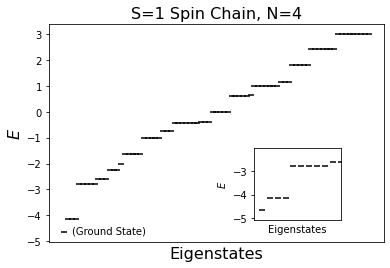

In [77]:

fig,ax1= plt.subplots()
plt.scatter(np.arange(0,len(eig_value)),eig_value,marker='_',color='black')
plt.xlabel('Eigenstates',size=16)
plt.ylabel(r'$E$',size=16)
plt.xticks([])
plt.title('S=1 Spin Chain, '+'N='+str(N),size=16)
plt.text(2,-4.7,'(Ground State)')

left, bottom, width, height = [0.6, 0.2, 0.2, 0.25]
ax2 = fig.add_axes([left, bottom, width, height])
ax2.scatter(np.arange(0,len(eig_value)),eig_value,marker='_',color='black')
ax2.set_xlim(-1,10)
ax2.set_ylim(-5.1,-2.01)
ax2.set_xticks([])
ax2.set_xlabel('Eigenstates')
ax2.set_ylabel(r'$E$')
#plt.savefig('s1_4.eps',dpi=300,format='eps')
#plt.xlim(-1,10)


<font  face=Times color=darkblue size=3> We can see the ground state is non-degenerate and the denegeracy of 1st and 2nd excited state are 3 and 5. <br> Then measure $\langle S_z\rangle$ and $\langle S_{total}^2\rangle$.
    
$S^2  = 2\begin{pmatrix} 1 && 0 && 0 \\ 0 && 1 && 0 \\ 0 && 0 && 1 \end{pmatrix}$.

In [ ]:
matrix_U=np.zeros((dimension,dimension)) #mat_U
matrix_Udag=np.zeros((dimension,dimension))
for i in range(dimension):
    matrix_U[:,i]=eig_vec[:,i].reshape(dimension)
    matrix_Udag[i,:]=np.conj(eig_vec[:,i].reshape(dimension))

In [ ]:
mat_Sz=np.zeros((dimension,dimension))
mat_S2=np.zeros((dimension,dimension))

In [ ]:
##construct Sz matrix
for a in range(dimension):
    chain=ten_2_tri(a) 
    l=len(chain)
    chain=z[0:N-l]+chain #make the length equal to N
    up_number=chain.count('2')
    down_number=chain.count('0')
    mat_Sz[a,a]=1*up_number-1*down_number  #this code of measurement is for all chain
    

mat_S2=2*N*np.identity(dimension)+2*H              # this measurement is written for N=2 only

In [ ]:
 mat_Sz

array([[-2.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0., -1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0., -1.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  2.]])

In [ ]:
mat_S2

array([[6., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 4., 0., 2., 0., 0., 0., 0., 0.],
       [0., 0., 2., 0., 2., 0., 0., 0., 0.],
       [0., 2., 0., 4., 0., 0., 0., 0., 0.],
       [0., 0., 2., 0., 4., 0., 2., 0., 0.],
       [0., 0., 0., 0., 0., 4., 0., 2., 0.],
       [0., 0., 0., 0., 2., 0., 2., 0., 0.],
       [0., 0., 0., 0., 0., 2., 0., 4., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 6.]])

In [ ]:
mz_list=[]
s2_list=[]
for i in range(dimension):
    mz_list.append(np.dot(np.dot(matrix_Udag,mat_Sz),matrix_U)[i,i])#measure
    s2_list.append(np.dot(np.dot(matrix_Udag,mat_S2),matrix_U)[i,i])#measure s^2

In [ ]:
eig_value

array([-2., -1., -1., -1.,  1.,  1.,  1.,  1.,  1.])

In [ ]:
mz_list

[0.0,
 0.9999999999999998,
 0.0,
 -0.9999999999999998,
 0.9999999999999998,
 0.0,
 -0.9999999999999998,
 -2.0,
 2.0]

In [ ]:
s2_list

[3.4512664603419266e-31,
 1.9999999999999996,
 1.9999999999999996,
 1.9999999999999996,
 5.999999999999999,
 6.000000000000001,
 5.999999999999999,
 6.0,
 6.0]

<font  face=Times color=darkblue size=3> For ground state: $E_0=-2$, $S_{total}^z=0$, and $S_{total}=0$.
    <br>For the 3 1st excited state:$E_0=-1$, $S_{total}^z=-1,0,1$, and $S_{total}=1$.
    <br> For the 5 2nd excited state:$E_0=1$, $S_{total}^z=-2,-1,0,1,2$, and $S_{total}=2$ ($S(S+1)=6$).